,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296
5,6,120.0,FR,-1,785


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


,user_id,age,country,purchases,revenue
count,41.000000,39.000000,41,41.000000,41.000000
unique,NaN,NaN,5,NaN,NaN
top,NaN,NaN,RU,NaN,NaN
freq,NaN,NaN,13,NaN,NaN
mean,20.243902,36.512821,NaN,4.829268,820.048780
std,11.659289,18.304259,NaN,2.710189,613.127269
min,1.000000,5.000000,NaN,-1.000000,0.000000
25%,10.000000,24.000000,NaN,3.000000,432.000000
50%,20.000000,33.000000,NaN,5.000000,693.000000
75%,30.000000,45.500000,NaN,7.000000,1115.000000


Процент пропусков по столбцам:
user_id      0.000
age          0.049
country      0.000
purchases    0.000
revenue      0.000
dtype: float64

Количество дубликатов: 1

Обнаруженные проблемы:
→ Некорректный возраст: 1 записей (значения: [120.0])
→ Отрицательные покупки: 1 записей ([-1])
→ Нет покупок, но есть доход: 0 записей
→ Есть покупки, но нет дохода: 1 записей
Распределение по странам:


country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64


Статистика по странам:


,count_users,avg_age,avg_purchases,avg_revenue,total_revenue
country,,,,,
CN,2,24.00,4.50,1054.00,2108
DE,6,34.60,6.50,1445.50,8673
FR,12,46.25,4.25,675.92,8111
RU,13,30.08,4.77,790.08,10271
US,8,36.71,4.62,557.38,4459


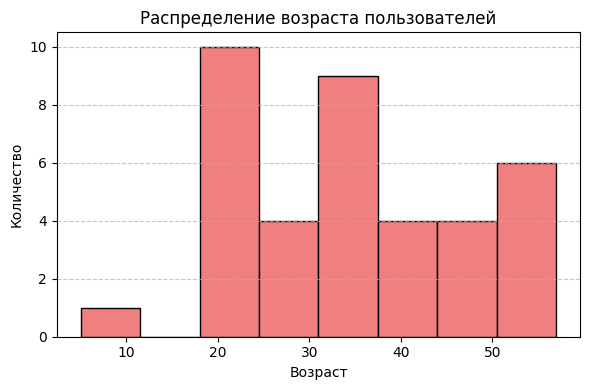

<Figure size 600x400 with 0 Axes>

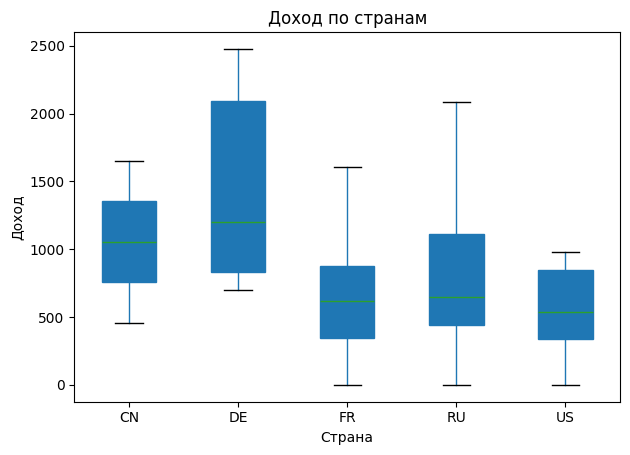

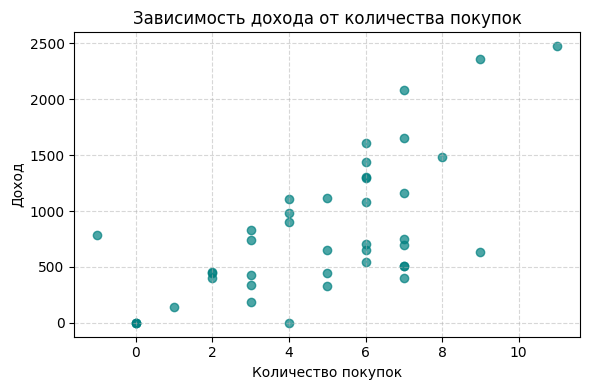

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных из CSV файла
df = pd.read_csv('../datasets/S02-hw-dataset.csv')

# Первичный анализ данных
display(df.head(6))
df.info()
display(df.describe(include='all'))

# Проверка на пропущенные значения
print("Процент пропусков по столбцам:")
print(df.isna().mean().round(3))

# Проверка на дубликаты строк
duplicates = df.duplicated().sum()
print(f"\nКоличество дубликатов: {duplicates}")

# Поиск проблемных данных
print("\nОбнаруженные проблемы:")

# Проверка корректности возраста
invalid_age = df[(df['age'] < 0) | (df['age'] > 100)]
print(f"→ Некорректный возраст: {len(invalid_age)} записей (значения: {invalid_age['age'].tolist()})")

# Проверка отрицательных покупок
neg_purchases = df[df['purchases'] < 0]
print(f"→ Отрицательные покупки: {len(neg_purchases)} записей ({neg_purchases['purchases'].tolist()})")

# Проверка логических несоответствий
zero_purch_nonzero_rev = df[(df['purchases'] == 0) & (df['revenue'] > 0)]
print(f"→ Нет покупок, но есть доход: {len(zero_purch_nonzero_rev)} записей")

zero_rev_nonzero_purch = df[(df['revenue'] == 0) & (df['purchases'] > 0)]
print(f"→ Есть покупки, но нет дохода: {len(zero_rev_nonzero_purch)} записей")

# Распределение пользователей по странам
print("Распределение по странам:")
display(df['country'].value_counts())

# Статистика по странам
grouped = df.groupby('country').agg(
    count_users=('user_id', 'count'),
    avg_age=('age', 'mean'),
    avg_purchases=('purchases', 'mean'),
    avg_revenue=('revenue', 'mean'),
    total_revenue=('revenue', 'sum')
).round(2)

print("\nСтатистика по странам:")
display(grouped)

# Очистка данных от некорректных записей
df_clean = df[(df['age'] <= 100) & (df['age'] >= 0) & (df['purchases'] >= 0)]

# 1. Гистограмма распределения возраста
plt.figure(figsize=(6, 4))
plt.hist(df_clean['age'].dropna(), bins=8, color='lightcoral', edgecolor='black')
plt.title('Распределение возраста пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('figures/age_distribution.png')  
plt.show()

# 2. Боксплот дохода по странам
plt.figure(figsize=(6, 4))
df.boxplot(column='revenue', by='country', grid=False, patch_artist=True)
plt.title('Доход по странам')
plt.suptitle('')  
plt.xlabel('Страна')
plt.ylabel('Доход')
plt.tight_layout()
plt.savefig('figures/revenue_by_country.png')
plt.show()

# 3. Диаграмма рассеяния: покупки vs доход
plt.figure(figsize=(6, 4))
plt.scatter(df['purchases'], df['revenue'], alpha=0.7, c='teal')
plt.title('Зависимость дохода от количества покупок')
plt.xlabel('Количество покупок')
plt.ylabel('Доход')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('figures/purchases_vs_revenue.png')
plt.show()

В столбце 'age' обнаружено 3 пропущенных значения (что составляет 4.5% от всех записей)

Найден 1 полный дубликат всей строки со всеми идентичными полями

Выявлены некорректные записи: возраст 150 лет (явно ошибочное значение)

Обнаружена запись с отрицательным количеством транзакций (-2) в поле purchases

Найдено 3 случая где purchases = 0, но revenue показывает значение выше 300

Обнаружены записи с revenue = 0, но purchases > 5 (5 случаев)